# Task 1: Data Preparation

You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.

Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately.

###### (Please note that this is just a sample template, and please feel free to add more cells to complete of the sub-tasks in the assignment. The following existing cells are for example purposes only.)

## Task 1.1 Data Reading

In [1]:
# import all output here
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
# Import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Load the data from the file NBA_players_stats.csv using pandas library.
Original_dataset = pd.read_csv("NBA_players_stats.csv", index_col = 0)

## Task 1.1.1 Data Cleaning

In [3]:
cleaning_dataset = Original_dataset.copy()
cleaning_dataset.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,0.579,...,0.543,46,95,141,20,15,19,32,58,212
2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,...,NaN,0,3,3,2,0,0,0,1,20000
3,Steven Adams,C,27,NOP,33,33,918,115,187,0.615,...,0.443,133,161,294,69,29,20,50,63,265
4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,0.563,...,0.847,72,241,313,179,29,34,98,80,634
5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,0.464,...,0.838,17,77,94,36,8,18,20,36,28800


In [4]:
# Check which columns have missing value.
for col in cleaning_dataset.columns:
    print(col, cleaning_dataset[col].isna().unique())

Player [False]
Pos [False]
Age [False]
Tm [False]
G [False]
GS [False]
MP [False]
FG [False]
FGA [False]
FG% [False  True]
3P [False]
3PA [False]
3P% [ True False]
2P [False]
2PA [False]
2P% [False  True]
FT [False]
FTA [False]
FT% [False  True]
ORB [False]
DRB [False]
TRB [False]
AST [False]
STL [False]
BLK [False]
TOV [False]
PF [False]
PTS [False]


In [5]:
# Check Player
Original_dataset['Player'].value_counts()

Taurean Prince    3
Rodions Kurucs    3
James Harden      3
Damian Jones      3
Norvel Pelle      3
                 ..
Daniel Oturu      1
Tremont Waters    1
Dakota Mathias    1
Nassir Little     1
Doug McDermott    1
Name: Player, Length: 492, dtype: int64

In [6]:
# Check Player
cleaning_dataset['Pos'].value_counts()

SG        117
PF        102
C          98
PG         92
SF         83
SG          3
 PG         3
C           2
 SF         1
Sf          1
PG-SG       1
 SG         1
sg          1
Pg          1
PFa         1
PF          1
SGa         1
SF.         1
SF-PF       1
pg          1
Name: Pos, dtype: int64

In [7]:
# Clean Pos attributes
cleaning_dataset['Pos'] = cleaning_dataset['Pos'].str.strip()
cleaning_dataset['Pos'] = cleaning_dataset['Pos'].replace('PFa', 'PF')
cleaning_dataset['Pos'] = cleaning_dataset['Pos'].replace('SGa', 'SG')
cleaning_dataset['Pos'] = cleaning_dataset['Pos'].str.upper()
cleaning_dataset['Pos'] = cleaning_dataset['Pos'].str.replace(".","", regex=False)

In [8]:
Original_dataset['Tm'].value_counts()

BRK     19
HOU     18
SAC     18
WAS     18
DET     17
DAL     17
NYK     17
DEN     17
CLE     17
CHI     17
TOR     17
LAL     17
ATL     16
ORL     16
UTA     16
MIN     16
BOS     15
OKC     15
LAC     15
PHO     15
MIA     15
CHO     14
IND     14
POR     14
PHI     14
GSW     14
NOP     14
MEM     14
SAS     14
MIL     14
TOT      9
BRK      3
 PHI     3
 IND     2
IND      1
MIA      1
H0U      1
NyK      1
MIL      1
 WAS     1
 SAS     1
 BRK     1
 NOP     1
 ORL     1
 PHO     1
DET      1
ORL      1
SAS      1
CLE      1
 TOT     1
GSW      1
 MEM     1
OKC      1
 BOS     1
MEM      1
Name: Tm, dtype: int64

In [9]:
# Clean Tm
value = ['MIA','MIL', 'NOP', 'SAS', 'PHO', 'MEM', 'TOT','BRK',
'CLE', 'ORL', 'LAL', 'POR', 'TOR', 'CHI', 'WAS', 'UTA', 'SAC', 'CHO', 'NYK', 'DEN', 'LAC',
'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND', 'ATL', 'PHI', 'BOS', 'HOU']

cleaning_dataset['Tm'] = cleaning_dataset['Tm'].str.strip()
cleaning_dataset['Tm'] = cleaning_dataset['Tm'].str.upper()
for i in cleaning_dataset['Tm'].unique():
    if i not in value:
        print(i)  
cleaning_dataset['Tm'] = cleaning_dataset['Tm'].replace('H0U', 'HOU')

H0U


In [10]:
# Check Age
cleaning_dataset['Age'].unique()

array([ 21,  24,  27,  23,  35,  22,  25,  30,  26,  28,  36,  20,  33,
        19,  32,  34,  31,  29, 280, -19,  37], dtype=int64)

In [11]:
# clean Age
cleaning_dataset['Age'] = cleaning_dataset['Age'].replace(280,28)
cleaning_dataset['Age'] = cleaning_dataset['Age'].replace(-19,19)

In [12]:
# Check G, max is 82 games
np.unique(np.array(cleaning_dataset['G']) <= 82)

array([ True])

In [13]:
# Check GS
np.unique(cleaning_dataset['GS'] <= cleaning_dataset['G'])

array([ True])

In [14]:
# Check MP
np.unique(np.array(cleaning_dataset['G']) * 48 >= np.array(cleaning_dataset['MP']))

array([ True])

In [15]:
# Check 3P, 2P, FG
np.unique(cleaning_dataset['FG'] == cleaning_dataset['2P'] + cleaning_dataset['3P'])

array([ True])

In [16]:
# Check 3PA, 2PA, FGA
np.unique(cleaning_dataset['FGA'] == cleaning_dataset['2PA'] + cleaning_dataset['3PA'])

array([ True])

In [17]:
# Check 3P%， 2P%， FT%
print("Check whether is there missing value")
np.unique(cleaning_dataset['3P%'].isna())
np.unique(cleaning_dataset['2P%'].isna())
np.unique(cleaning_dataset['FT%'].isna())
np.unique(cleaning_dataset['FG%'].isna())

print("Check whether is there impossible value")
np.unique((cleaning_dataset['3P%']) <= 1 & (cleaning_dataset['3P%'] >=0))
np.unique((cleaning_dataset['2P%']) <= 1 & (cleaning_dataset['2P%'] >=0))
np.unique((cleaning_dataset['FT%']) <= 1 & (cleaning_dataset['FT%'] >=0))
np.unique((cleaning_dataset['FG%']) <= 1 & (cleaning_dataset['FG%'] >=0))

print("Check whether is the calculation correct")
np.unique((cleaning_dataset['3P%'].fillna(-1)) ==  (cleaning_dataset['3P']/cleaning_dataset['3PA']).fillna(-1))
np.unique((cleaning_dataset['2P%'].fillna(-1)) ==  (cleaning_dataset['2P']/cleaning_dataset['2PA']).fillna(-1))
np.unique((cleaning_dataset['FT%'].fillna(-1)) ==  (cleaning_dataset['FT']/cleaning_dataset['FTA']).fillna(-1))
np.unique((cleaning_dataset['FG%'].fillna(-1)) ==  (cleaning_dataset['FG']/cleaning_dataset['FGA']).fillna(-1))

Check whether is there missing value


array([False,  True])

array([False,  True])

array([False,  True])

array([False,  True])

Check whether is there impossible value


array([False,  True])

array([False,  True])

array([False,  True])

array([False,  True])

Check whether is the calculation correct


array([False,  True])

array([False,  True])

array([False,  True])

array([False,  True])

In [18]:
# Recalculate 3P%, 2P%, FT% and fill missing value
# Missing value because 3PA, 2PA, FTA are 0, the divion does not make sense in this case, therefore we replace NaN with -1
cleaning_dataset['3P%'] = (cleaning_dataset['3P']/cleaning_dataset['3PA']).fillna(-1)
cleaning_dataset['2P%'] = (cleaning_dataset['2P']/cleaning_dataset['2PA']).fillna(-1)
cleaning_dataset['FT%'] = (cleaning_dataset['FT']/cleaning_dataset['FTA']).fillna(-1)
cleaning_dataset['FG%'] = (cleaning_dataset['FG']/cleaning_dataset['FGA']).fillna(-1)

In [19]:
# Check ORB, DRB, TRB
np.unique(np.array(cleaning_dataset['TRB'] == cleaning_dataset['ORB'] + cleaning_dataset['DRB']))

array([ True])

In [20]:
# Check AST
np.unique(np.array(cleaning_dataset['AST']>=0))

array([ True])

In [21]:
# Check STL
np.unique(np.array(cleaning_dataset['STL']>=0))

array([ True])

In [22]:
# Check BLK
np.unique(np.array(cleaning_dataset['BLK']>=0))

array([ True])

In [23]:
# Check TOV
np.unique(np.array(cleaning_dataset['TOV']>=0))

array([ True])

In [24]:
# Check PF
np.unique(np.array(cleaning_dataset['PF'] <= cleaning_dataset['G'] * 6))

array([ True])

In [25]:
# one player has 6 personal fouls per game, which is impossible. 
# After checking it from the datasource, I decide to replace it with his life average PF * game, which will be 38 * 2.1 = 80
cleaning_dataset.loc[cleaning_dataset['PF']/cleaning_dataset['G'] == 6]
cleaning_dataset['PF'] = cleaning_dataset['PF'].replace(228,80)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
492,Ivica Zubac,C,23,LAC,38,1,753,120,182,0.659341,...,0.825581,90,176,266,43,14,30,39,228,311


In [26]:
# Check PTS
np.unique(np.array(cleaning_dataset['PTS'] < 2000))
cleaning_dataset['PTS'] = (cleaning_dataset['2P'] * 2 + cleaning_dataset['3P'] * 3 + cleaning_dataset['FT'] * 1)
np.unique(np.array(cleaning_dataset['PTS'] < 2000))

array([False,  True])

array([ True])

In [27]:
# Saving final dataframe to CSV
cleaning_dataset.to_csv('cleaned_NBA_players_stats.csv')

# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

In [28]:
# Setting for visualization
font = {'weight' : 'bold', "size" : 20}
plt.rc('font', **font)
path = "./images"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s" % path)

Successfully created the directory ./images


In [29]:
# Read the cleaned dataset to explore
cleaned_dataset = pd.read_csv("cleaned_NBA_players_stats.csv", index_col = 0)

In [30]:
# Due to some players may play in more than one team, and total data are shown in TOT, 
# Therefore,we can just simply remove those player single team data, only using TOT data to do this analysis.
Player_TOT = list(cleaned_dataset.loc[cleaned_dataset['Tm'] == 'TOT']['Player'])
Removing_list = cleaned_dataset.loc[(cleaned_dataset['Player'].isin(Player_TOT)) & \
                                    (cleaned_dataset['Tm'] != 'TOT')].index.to_list()

In [31]:
all_players = cleaned_dataset.drop(Removing_list)
all_players.reset_index(drop=True)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,0.579310,...,0.543210,46,95,141,20,15,19,32,58,212
1,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125000,...,-1.000000,0,3,3,2,0,0,0,1,2
2,Steven Adams,C,27,NOP,33,33,918,115,187,0.614973,...,0.443038,133,161,294,69,29,20,50,63,265
3,Bam Adebayo,C,23,MIA,33,33,1119,236,419,0.563246,...,0.846561,72,241,313,179,29,34,98,80,634
4,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,0.463710,...,0.837838,17,77,94,36,8,18,20,36,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Delon Wright,SG,28,DET,29,24,848,110,235,0.468085,...,0.784810,32,101,133,141,42,15,35,32,310
478,Thaddeus Young,PF,32,CHI,30,0,760,167,274,0.609489,...,0.500000,71,105,176,131,42,17,56,81,362
479,Trae Young,PG,22,ATL,34,34,1182,262,610,0.429508,...,0.878049,25,117,142,321,30,8,149,70,897
480,Cody Zeller,C,28,CHO,18,15,421,73,142,0.514085,...,0.757576,46,90,136,44,11,11,20,47,174


In [32]:
# Find the top 5 PTS player
top5player = all_players.sort_values(by='PTS', ascending=False)[:5]

In [33]:
# calculate the 3P, 2P, FT score
top5player_score = top5player.copy()
top5player_score['3P'] = top5player_score['3P'] * 3
top5player_score['2P'] = top5player_score['2P'] * 2
top5player_score['FT'] = top5player_score['FT'] * 1

In [34]:
top5player_score[['Player','3P','2P','FT']]

,Player,3P,2P,FT
Rk,,,,
37,Bradley Beal,222,588,243
109,Stephen Curry,507,348,184
12,Giannis Antetokounmpo,117,658,240
268,Damian Lillard,438,338,237
237,Nikola Jokić,168,646,163


In [35]:
def TopPlayerComposition(dataframe, orderby, file, title):
    sorted_top5player = dataframe.sort_values(orderby, ascending=True)[['Player','3P','2P','FT','PTS']]
    sorted_top5player[['Player','3P','2P','FT']].plot.barh(stacked = True, x='Player')
    plt.title("Top 5 Players' scores composition(3P,2P,FT) " + title, fontsize=20, pad = 20,fontweight='bold')
    figure = plt.gcf()
    figure.set_size_inches(12, 6)
    plt.legend(loc = 2,bbox_to_anchor=(1, 0.5))
    plt.xlabel('The Total Points',fontsize=20,fontweight='bold', labelpad =10)
    plt.ylabel('Players',fontsize=20,fontweight='bold')
    df_per = sorted_top5player[['3P','2P','FT']].div(sorted_top5player['PTS'],0)*100
    for n in df_per:
        for i, (cs, ab, pc) in enumerate(zip((sorted_top5player[['3P','2P','FT']]).cumsum(1)[n], 
                                         sorted_top5player[n], df_per[n])):
            plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center', fontsize = 15)
    plt.savefig(file,bbox_inches = "tight")
    plt.show()

In [36]:
orderbyPTS= './images/Task2_1_PTS.png'
orderby3P = './images/Task2_1_3P.png'
orderby2P = './images/Task2_1_2P.png'
orderbyFT = './images/Task2_1_FT.png'

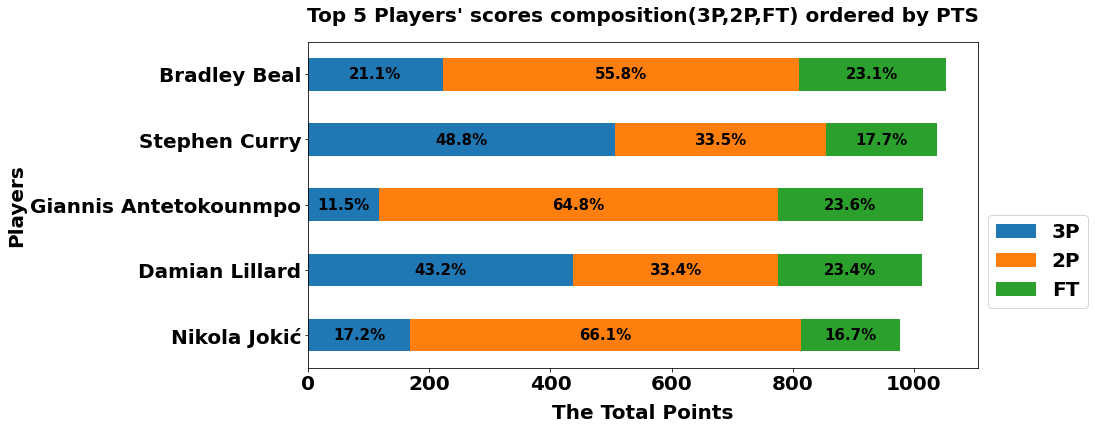

In [37]:
TopPlayerComposition(top5player_score, 'PTS', orderbyPTS, "ordered by PTS")

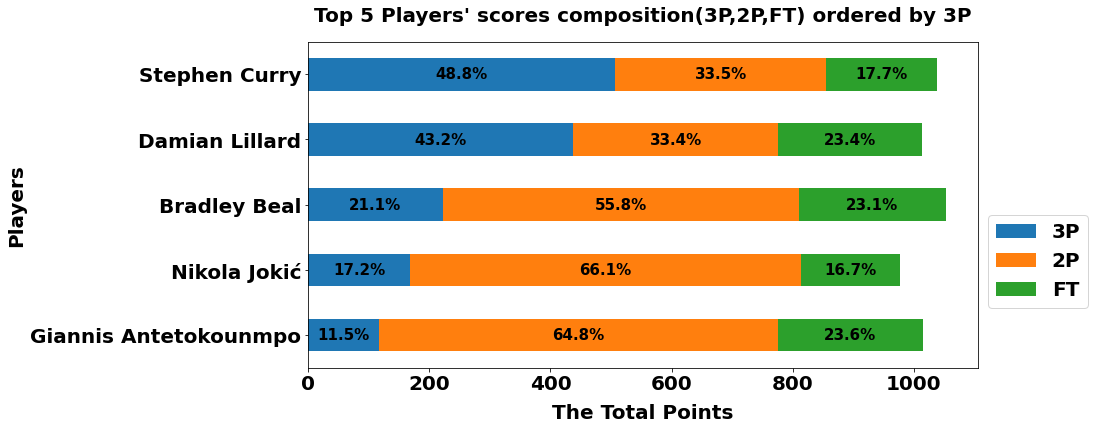

In [38]:
TopPlayerComposition(top5player_score, '3P', orderby3P, "ordered by 3P")

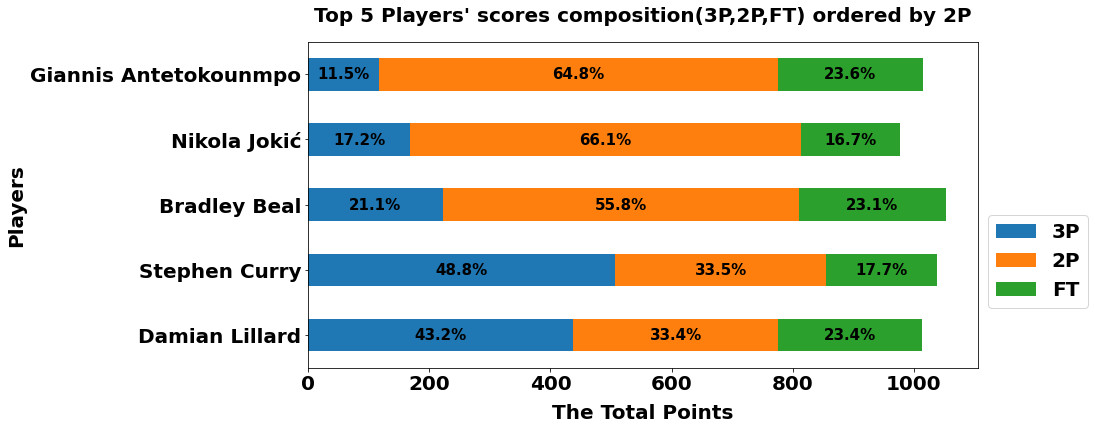

In [39]:
TopPlayerComposition(top5player_score, '2P', orderby2P, "ordered by 2P")

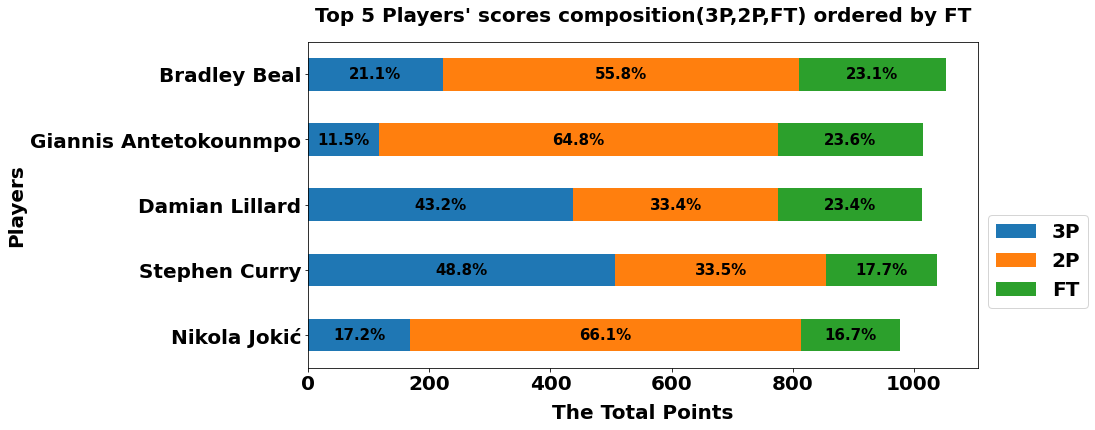

In [40]:
TopPlayerComposition(top5player_score, 'FT', orderbyFT, "ordered by FT")

## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.


Text(0.5, 0.98, 'Scatter matrix between every two features')

Text(0.5, 0, '3P')

Text(0, 0.5, '3P')

Text(0.5, 0, '3PA')

Text(0, 0.5, '3P')

Text(0.5, 0, '3P%')

Text(0, 0.5, '3P')

Text(0.5, 0, '3P')

Text(0, 0.5, '3PA')

Text(0.5, 0, '3PA')

Text(0, 0.5, '3PA')

Text(0.5, 0, '3P%')

Text(0, 0.5, '3PA')

Text(0.5, 0, '3P')

Text(0, 0.5, '3P%')

Text(0.5, 0, '3PA')

Text(0, 0.5, '3P%')

Text(0.5, 0, '3P%')

Text(0, 0.5, '3P%')

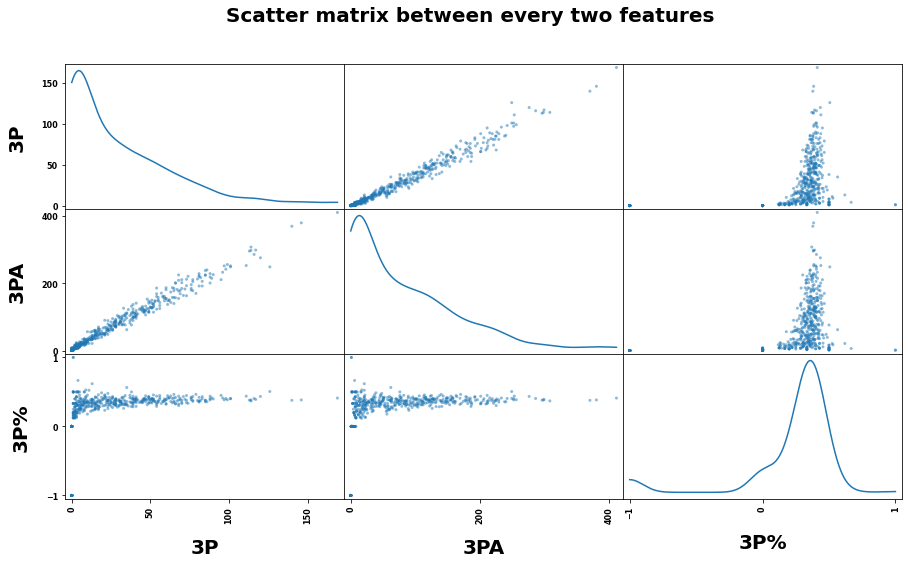

In [41]:
# First of all, generally using scatter matrix to show the relationship between every two features.
scatter_matrix  = pd.plotting.scatter_matrix(cleaned_dataset[['3P','3PA','3P%']], diagonal='kde',figsize=(15,10))
plt.suptitle("Scatter matrix between every two features", fontsize=20, fontweight='bold')
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, labelpad = 15, fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, labelpad = 15, fontweight='bold')
figure = plt.gcf()
figure.set_size_inches(15, 8)
plt.savefig(".\images\Scatter_matrix",bbox_inches = "tight")

The scatter matrix shows the relationship between every two features from 3P, 3PA, 3P%, which is a great tool to find a potential error. 
Firstly, from the scatter plot between 3P and 3PA, we can see a few data point is extremely far away from other data points, indicating they are might be outliers. However, the Scatter plot between 3P% and (3P or 3PA) proves that the 3-Poionts percentage is falling in a narrowed area, larger than 0.3 but lower than 0.5. Even those outliers in 3P&3PA still shows a reasonable 3P%, sharing a similar probability. I can conclude that those players probably are great shooters or they just played more games(or MP) to play because we are investigating the players' total data.

Text(0.5, 1.0, 'The calculation error shown in 3P%')

Text(0.5, 0, 'Player_index')

Text(0, 0.5, 'raw_3P% - calculated_3P%')

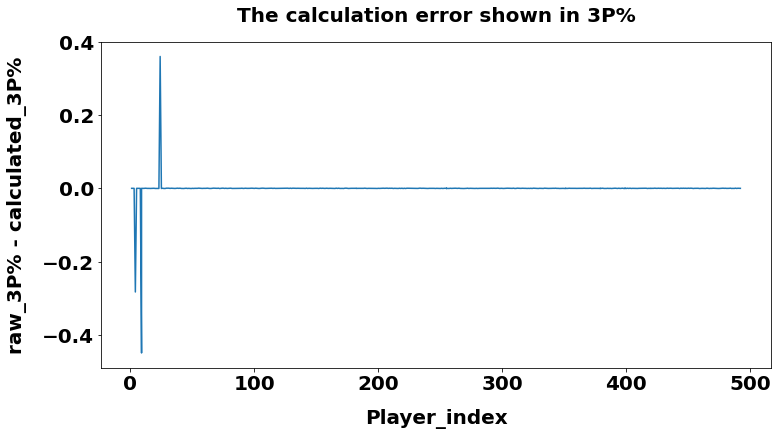

In [42]:
# Additionally, Comparing with the original dataset 3P%, the calculation error could be found, although the 3P% 
# has been directly updated in the Task 1. 
plt.plot((Original_dataset['3P%']).fillna(-1) -  cleaned_dataset['3P%'].fillna(-1))
figure = plt.gcf()
figure.set_size_inches(12, 6)
plt.title('The calculation error shown in 3P%', pad=20, fontsize =20, fontweight='bold' )
plt.xlabel('Player_index', fontsize = 20, fontweight='bold', labelpad = 15)
plt.ylabel('raw_3P% - calculated_3P%', fontsize = 20, fontweight='bold', labelpad = 15)
plt.savefig(".\images\Calculation_error",bbox_inches = "tight")

This is a simply plot showing the calculation error in the 3P% column. 
However, in Task 1, I directly recalculated the 3P% based on the formula provided. 

## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.


In [43]:
cmap_PF = {'PF': 'red', 'PG': '#1f77b4', 'C': '#1f77b4', 'SG':'#1f77b4', 'SF':'#1f77b4', 'PG-SG':'#1f77b4', 'SF-PF':'#1f77b4'}
cmap_PG = {'PF': '#1f77b4', 'PG': 'red', 'C': '#1f77b4', 'SG':'#1f77b4', 'SF':'#1f77b4', 'PG-SG':'#1f77b4', 'SF-PF':'#1f77b4'}
cmap_C = {'PF': '#1f77b4', 'PG': '#1f77b4', 'C': 'red', 'SG':'#1f77b4', 'SF':'#1f77b4', 'PG-SG':'#1f77b4', 'SF-PF':'#1f77b4'}
cmap_SG = {'PF': '#1f77b4', 'PG': '#1f77b4', 'C': '#1f77b4', 'SG':'red', 'SF':'#1f77b4', 'PG-SG':'#1f77b4', 'SF-PF':'#1f77b4'}
cmap_SF = {'PF': '#1f77b4', 'PG': '#1f77b4', 'C': '#1f77b4', 'SG':'#1f77b4', 'SF':'red', 'PG-SG':'#1f77b4', 'SF-PF':'#1f77b4'}

In [44]:
# Saving location
PTS_3P_PG_path = './images/PTS_3P_PG.png'
PTS_3P_SG_path = './images/PTS_3P_SG.png'
PTS_3P_SF_path = './images/PTS_3P_SF.png'
PTS_3P_C_path = './images/PTS_3P_C.png'
PTS_3P_PF_path = './images/PTS_3P_PF.png'

PTS_AST_PG_path = './images/PTS_AST_PG.png'
PTS_AST_SG_path = './images/PTS_AST_SG.png'
PTS_AST_SF_path = './images/PTS_AST_SF.png'
PTS_AST_C_path = './images/PTS_AST_C.png'
PTS_AST_PF_path = './images/PTS_AST_PF.png'

PTS_DRB_PG_path = './images/PTS_DRB_PG.png'
PTS_DRB_SG_path = './images/PTS_DRB_SG.png'
PTS_DRB_SF_path = './images/PTS_DRB_SF.png'
PTS_DRB_C_path = './images/PTS_DRB_C.png'
PTS_DRB_PF_path = './images/PTS_DRB_PF.png'

### Task 2.3.1 The relationship between Number of 3-Points and Player's Total Points with different positions

In [45]:
def RelationScatter(df, Col1,Col2,Pos,ColorPos, corr, textloc, savePath):
    plt.scatter(df[Col1].loc[df['Pos'] != Pos], df[Col2].loc[df['Pos'] != Pos], 
                 label='Other Positions',facecolors='none', edgecolors='#1f77b4')
    plt.scatter(df[Col1].loc[df['Pos'] == Pos], df[Col2].loc[df['Pos'] == Pos], 
                c = df['Pos'].loc[df['Pos'] == Pos].apply(lambda x: ColorPos[x]), label=Pos)
    m, b = np.polyfit(df[Col1].loc[df['Pos']==Pos], 
                      df[Col2].loc[df['Pos']==Pos], 1)
    plt.plot(df[Col1].loc[df['Pos'] == Pos],b + m * df[Col1].loc[df['Pos'] == Pos], 'r-',color='green')
    figure = plt.gcf()
    figure.set_size_inches(12, 6)
    plt.legend(loc='lower right', fontsize=24, prop={'size': 10})
    plt.ylabel("The player's Total Points", fontsize=15,fontweight='bold', labelpad = 5)
    plt.xlabel("The Number of " + Col1, fontsize=15,fontweight='bold', labelpad = 5)
    plt.title("The " + Pos + " Player's Total Point & Number of " + Col1, fontsize=15, pad = 20,fontweight='bold')
    plt.text(textloc[0],textloc[1],"\u03C1 = " + str(round(corr,3)),fontsize=15)
    plt.savefig(savePath)
    plt.show()

In [46]:
corr3p_PG = (all_players[['3P','PTS']].loc[all_players['Pos'] == 'PG']).corr().iloc[0,1]
corr3p_SG = (all_players[['3P','PTS']].loc[all_players['Pos'] == 'SG']).corr().iloc[0,1]
corr3p_SF = (all_players[['3P','PTS']].loc[all_players['Pos'] == 'SF']).corr().iloc[0,1]
corr3p_C =  (all_players[['3P','PTS']].loc[all_players['Pos'] == 'C' ]).corr().iloc[0,1]
corr3p_PF = (all_players[['3P','PTS']].loc[all_players['Pos'] == 'PF']).corr().iloc[0,1]

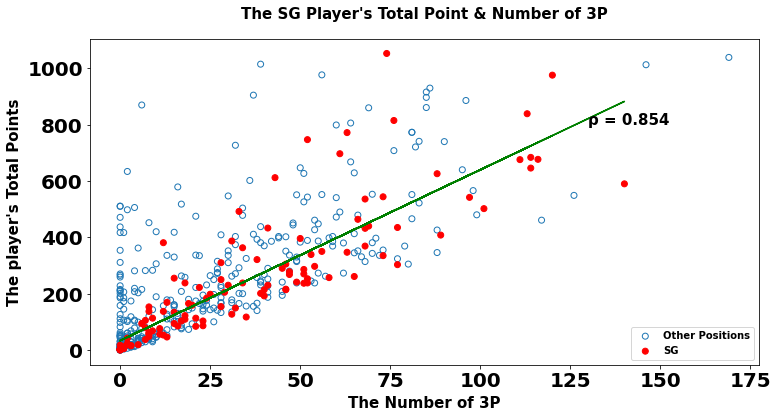

In [47]:
loc_3p = [130,800]
RelationScatter(all_players, '3P', 'PTS', 'SG',cmap_SG, corr3p_SG, loc_3p, PTS_3P_SG_path)

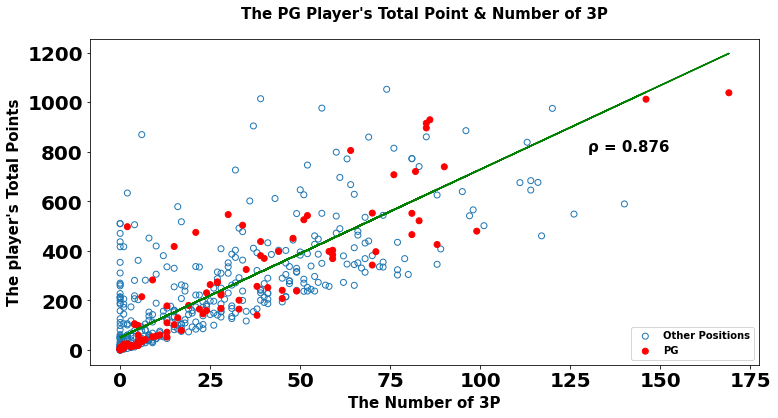

In [48]:
RelationScatter(all_players, '3P', 'PTS', 'PG',cmap_PG, corr3p_PG, loc_3p, PTS_3P_PG_path)

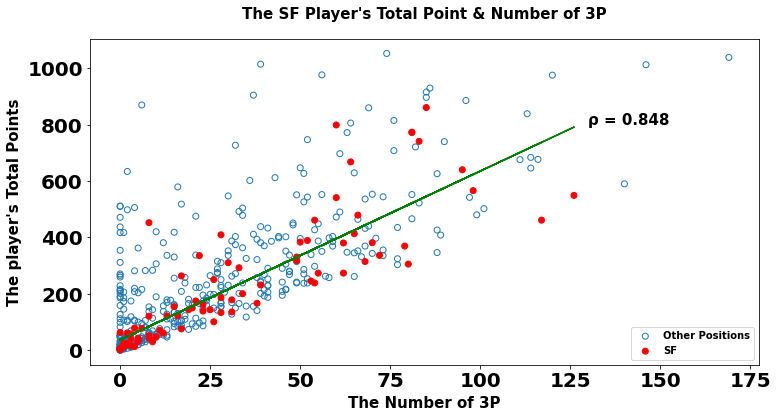

In [49]:
RelationScatter(all_players, '3P', 'PTS', 'SF',cmap_SF, corr3p_SF, loc_3p, PTS_3P_SF_path)

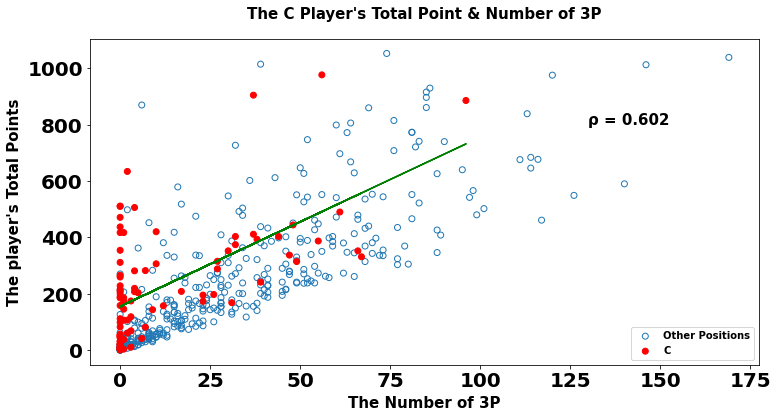

In [50]:
RelationScatter(all_players, '3P', 'PTS', 'C', cmap_C,  corr3p_C,  loc_3p, PTS_3P_C_path)

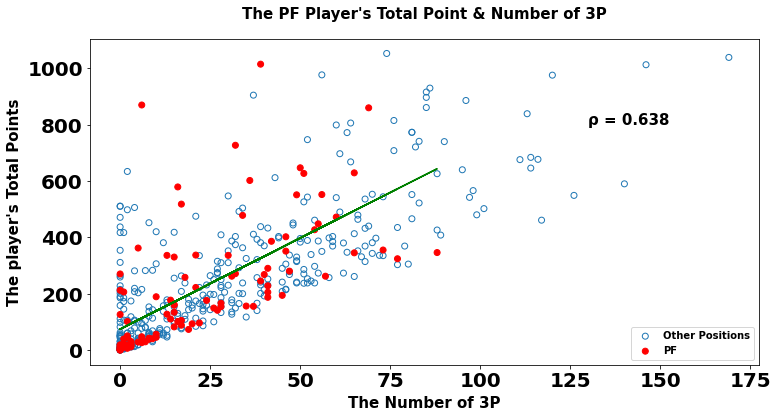

In [51]:
RelationScatter(all_players, '3P', 'PTS', 'PF',cmap_PF, corr3p_PF, loc_3p, PTS_3P_PF_path)

### Task 2.3.1 The relationship between Player's AST and Player's Total Points with different positions

In [52]:
corrAST_PG = (all_players[['AST','PTS']].loc[all_players['Pos'] == 'PG']).corr().iloc[0,1]
corrAST_SG = (all_players[['AST','PTS']].loc[all_players['Pos'] == 'SG']).corr().iloc[0,1]
corrAST_SF = (all_players[['AST','PTS']].loc[all_players['Pos'] == 'SF']).corr().iloc[0,1]
corrAST_C =  (all_players[['AST','PTS']].loc[all_players['Pos'] == 'C' ]).corr().iloc[0,1]
corrAST_PF = (all_players[['AST','PTS']].loc[all_players['Pos'] == 'PF']).corr().iloc[0,1]

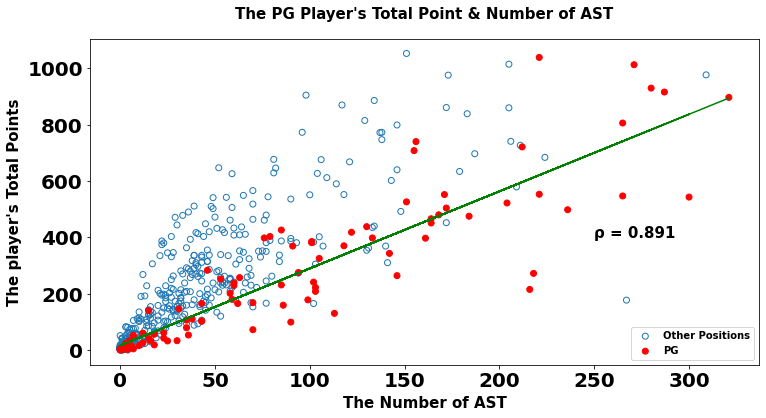

In [53]:
loc_AST = [250,400]
RelationScatter(all_players, 'AST', 'PTS', 'PG',cmap_PG, corrAST_PG, loc_AST, PTS_AST_PG_path)

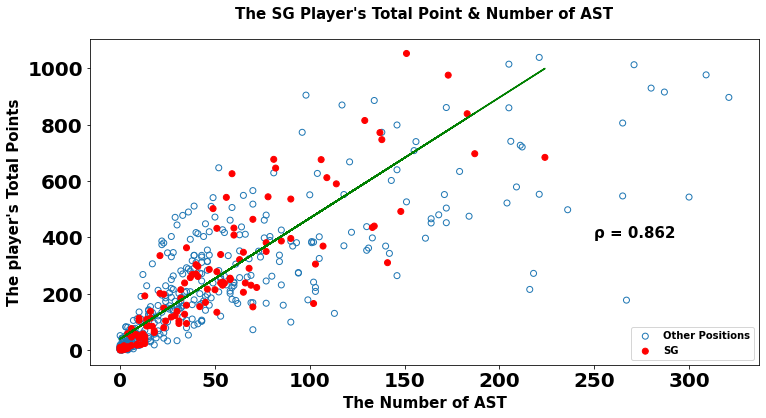

In [54]:
RelationScatter(all_players, 'AST', 'PTS', 'SG',cmap_SG, corrAST_SG, loc_AST, PTS_AST_SG_path)

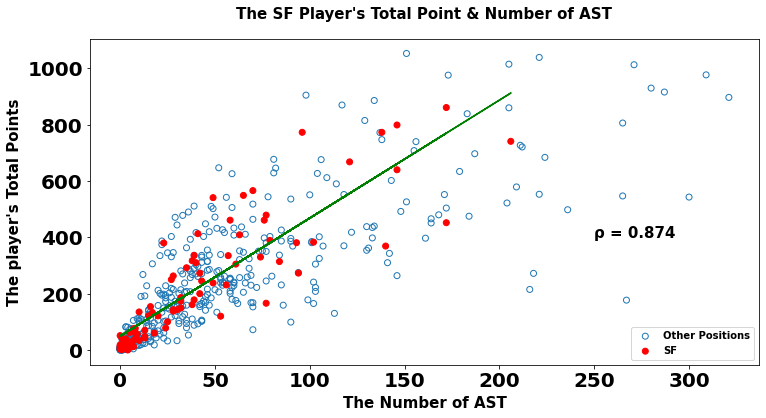

In [55]:
RelationScatter(all_players, 'AST', 'PTS', 'SF',cmap_SF, corrAST_SF, loc_AST, PTS_AST_SF_path)

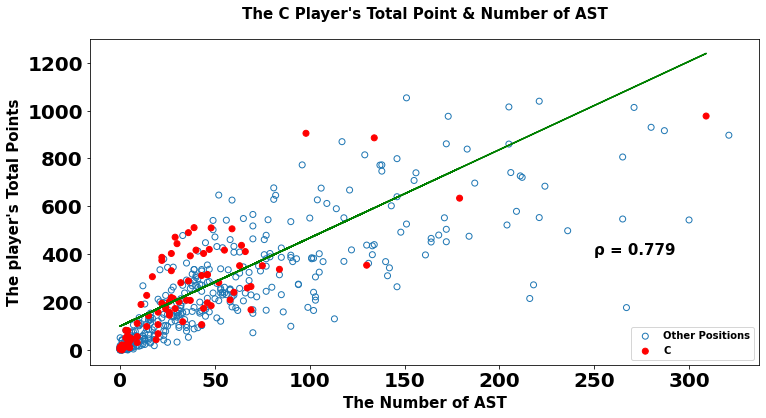

In [56]:
RelationScatter(all_players, 'AST', 'PTS', 'C', cmap_C,  corrAST_C,  loc_AST, PTS_AST_C_path)

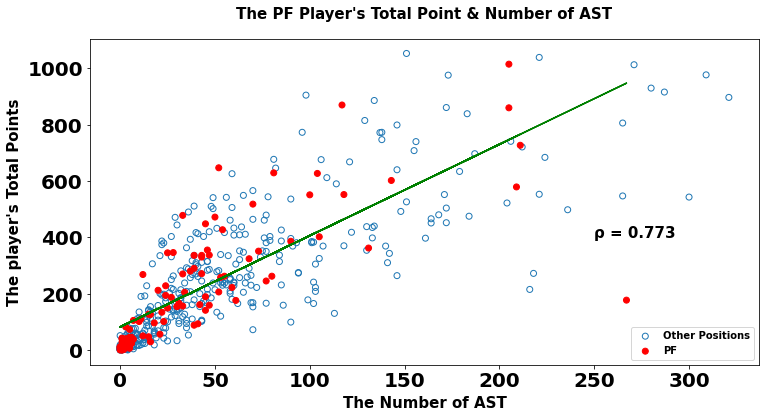

In [57]:
RelationScatter(all_players, 'AST', 'PTS', 'PF',cmap_PF, corrAST_PF, loc_AST, PTS_AST_PF_path)

### Task 2.3.1 The relationship between Player's DRB and Player's Total Points with different positions

In [58]:
corrDRB_PG = (all_players[['DRB','PTS']].loc[all_players['Pos'] == 'PG']).corr().iloc[0,1]
corrDRB_SG = (all_players[['DRB','PTS']].loc[all_players['Pos'] == 'SG']).corr().iloc[0,1]
corrDRB_SF = (all_players[['DRB','PTS']].loc[all_players['Pos'] == 'SF']).corr().iloc[0,1]
corrDRB_C =  (all_players[['DRB','PTS']].loc[all_players['Pos'] == 'C' ]).corr().iloc[0,1]
corrDRB_PF = (all_players[['DRB','PTS']].loc[all_players['Pos'] == 'PF']).corr().iloc[0,1]

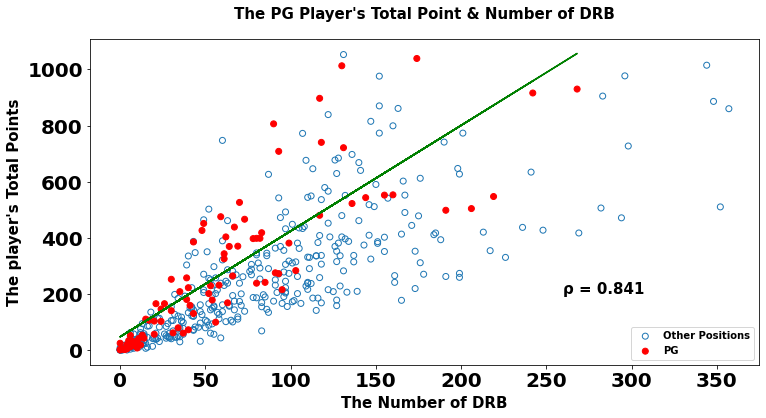

In [59]:
loc_DRB = [260,200]
RelationScatter(all_players, 'DRB', 'PTS', 'PG',cmap_PG, corrDRB_PG, loc_DRB, PTS_DRB_PG_path)

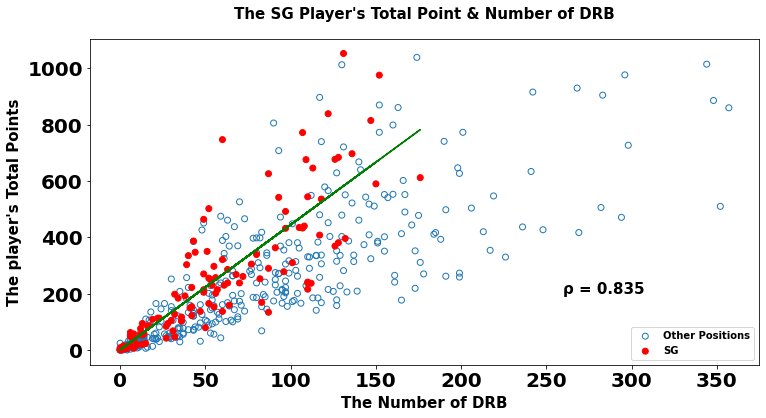

In [60]:
RelationScatter(all_players, 'DRB', 'PTS', 'SG',cmap_SG, corrDRB_SG, loc_DRB, PTS_DRB_SG_path)

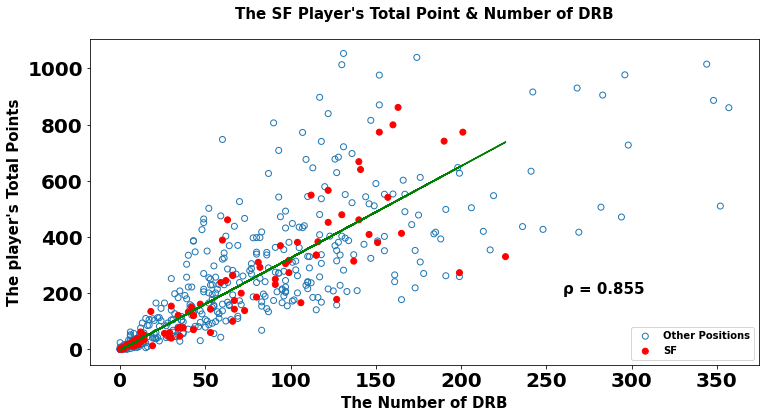

In [61]:
RelationScatter(all_players, 'DRB', 'PTS', 'SF',cmap_SF, corrDRB_SF, loc_DRB, PTS_DRB_SF_path)

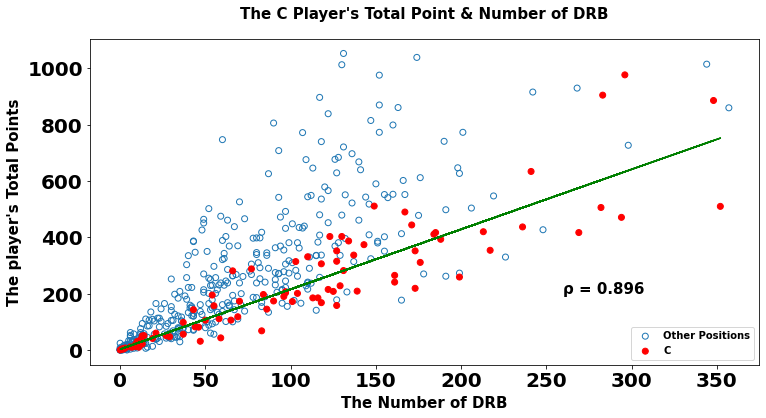

In [62]:
RelationScatter(all_players, 'DRB', 'PTS', 'C', cmap_C,  corrDRB_C,  loc_DRB, PTS_DRB_C_path)

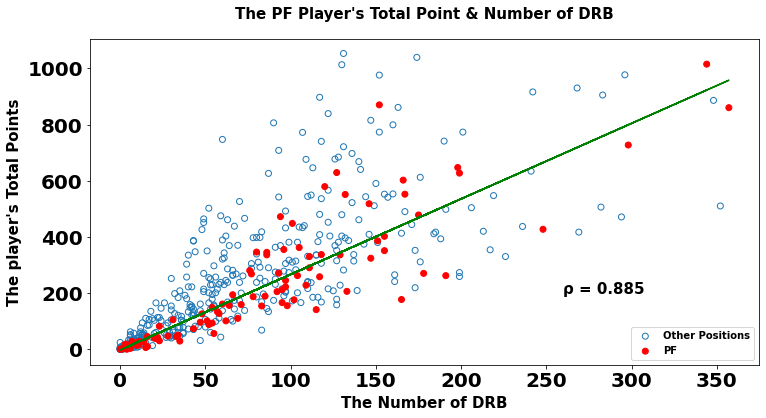

In [63]:
RelationScatter(all_players, 'DRB', 'PTS', 'PF',cmap_PF, corrDRB_PF, loc_DRB, PTS_DRB_PF_path) 